# Customer retention - Thinkful final exam

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
sns.set_style('darkgrid')

#### Let's import the data and have a first look.

We use the id column as our index, and try to answer some initial questions.

- Are there class imbalances?
- Are some features irrelevant?
- Are there immediately obvious trends?
- Are there problems with missing or NaN values?

In [74]:
df = pd.read_csv('test.csv', index_col='id')
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
id,,,,,,
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [75]:
df.card_on_file.value_counts()

yes    60087
no     59913
Name: card_on_file, dtype: int64

In [76]:
df.gender.value_counts()

male      60181
female    59819
Name: gender, dtype: int64

In [77]:
df.loyalty.value_counts()

False    100000
True      20000
Name: loyalty, dtype: int64

#### There is a clear class imbalance problem.

Customer loyalty in this sample leans strongly in the false direction. We can hope to address this and evalute true model performance via a confusion matrix.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 0 to 119999
Data columns (total 6 columns):
purch_amt                120000 non-null float64
gender                   120000 non-null object
card_on_file             120000 non-null object
age                      120000 non-null float64
days_since_last_purch    120000 non-null float64
loyalty                  120000 non-null bool
dtypes: bool(1), float64(3), object(2)
memory usage: 5.6+ MB


In [79]:
df = df.join(pd.get_dummies(df.gender))
df = df.join(pd.get_dummies(df.card_on_file, drop_first=True), rsuffix='card')
df.drop(columns=['gender', 'card_on_file'], inplace=True)

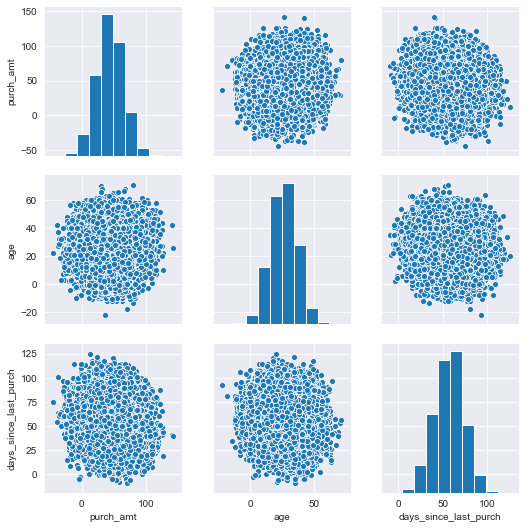

In [80]:
sns.pairplot(df.drop(columns=['female', 'male', 'yes', 'loyalty']))

#### Considering synthetic features.

These distributions look healthy, and I can't justify turning them into synthetic features. We could do things like age above 35, or 50 days since last purchase - we might go down that road when there is a clear separation in the distribution.

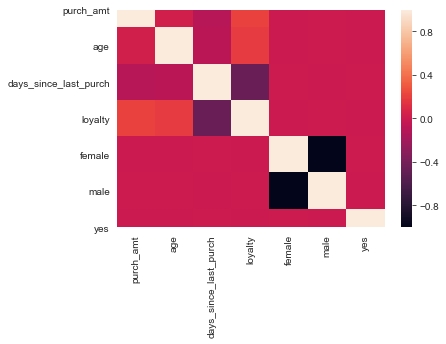

In [81]:
sns.heatmap(df.corr())

#### It appears that only a few features are affecting loyalty outcomes.

The correlation map above is showing total neutrality between some features. Before putting something like this into production, we could run several models verifying that.

#### Preliminary questions have been answered.

Now we can try and set up some models. We will use a few classification algorithms, as the question we are trying to answer is a positive or negative loyalty outcome. I have selected a few of the standard models - logistic regression, random forests, naive bayes, and even the gradient boosting classifier later on.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='loyalty'), df.loyalty, test_size=0.3)

In [83]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
clf_log.score(X_test, y_test)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8694166666666666

In [84]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8452222222222222

In [85]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
clf_gnb.score(X_test, y_test)

0.8716944444444444

In [86]:
# Maybe days since last purchase indicates leaving customers?
df2 = df
df2.days_since_last_purch = df.days_since_last_purch * - 1

In [87]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.drop(columns='loyalty'), df.loyalty, test_size=0.3)

In [88]:
clf_log = LogisticRegression()
clf_log.fit(X_train2, y_train2)
clf_log.score(X_test2, y_test2)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8683055555555556

#### No significant difference between models.

I chose the logistic regression model as this is tried and true - plus it performed well and *very fast.* We can run a grid search on it to see if any parameters help with performance.

In [89]:
params = {'penalty': ['l1', 'l2'], 'C': [1, .1, .01, .001, .0001]}

In [90]:
CV = GridSearchCV(clf_log, params)

In [91]:
CV.fit(X_train, y_train)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
CV.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [93]:
clf_log = LogisticRegression(penalty='l2', C=0.001)

In [94]:
clf_log.fit(X_train, y_train)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
clf_log.score(X_test, y_test)

0.8698055555555556

In [96]:
y_pred = clf_log.predict(X_test)

In [97]:
results = confusion_matrix(y_test, y_pred)
results / results.sum(axis=1)

array([[0.96309643, 0.18341625],
       [0.11948615, 0.40613599]])

#### Results didn't change much.

There are no immediately seen benefits when using the tuned hyper parameters.

The normalized matrix indicates how well classifications are occurring as a percentage - how well true negatives perform are identified in the top left, and the bottom right indicates how well true positive labels are identified. This could be expected as we have pointed out the class imbalance issue, but we are seeing much better than random selection performance. True negatives are identified corrently more than 96 percent of the time, and true positives are correctly identified more than twice the percentage in which they are present.

#### One more model - the GBC.

In [98]:
clf_gb = GradientBoostingClassifier()

In [99]:
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
clf_gb.score(X_test, y_test)

0.8703055555555556

In [101]:
params2 = {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 500], 'min_samples_split': [2, 3, 4]}
CV2 = GridSearchCV(clf_gb, params2)
CV2.fit(X_train, y_train)
CV2.best_params_

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.1, 'min_samples_split': 4, 'n_estimators': 100}

In [102]:
clf_gb = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=3, n_estimators=500)

In [103]:
clf_gb.fit(X_train, y_train)
y_pred = clf_gb.predict(X_test)
results = confusion_matrix(y_test, y_pred)
results / results.sum(axis=1)

array([[0.9627294 , 0.18524046],
       [0.11828495, 0.41210614]])

In [104]:
clf_gb.score(X_test, y_test)

0.8705

#### Significantly higher computation time at no apparent benefit.

I held on to this until the end as it is a computation hog. I would not take the GB route for this problem, even though it is known to perform better in many cases. The grid search took several minutes, as opposed to logistic regressions ten seconds or less. The scoring and confusion matrices are very similar. 

#### Dropping features.

Let's check our selected model - logistic regression - against the aforementioned data: the more highly correlated features of purchase amount, age, and days since last purchase.

In [105]:
df3 = df.drop(columns=['female', 'male', 'yes'])
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns='loyalty'), df3.loyalty, test_size=0.3)
clf_log.fit(X_train, y_train)
clf_log.score(X_test, y_test)

C:\Users\clayp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8695277777777778

In [106]:
results = confusion_matrix(y_test, clf_log.predict(X_test))
results / results.sum(axis=1)

array([[0.96226856, 0.18771784],
       [0.1189658 , 0.40813278]])

#### Very similar results with the uncorrelated features removed.

As we suspected, it looks like the model performance did not at all rely on the uncorrelated features. This would be my final approach to this problem, and I would work to improve it from there.